# PART 1 NEURAL NETWORK REGRESSION

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

UsageError: Line magic function `%tensorflow_version` not found.


In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set(color_codes = True)

ModuleNotFoundError: No module named 'seaborn'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Part- 1,2&3 - Signal.csv to Part- 1,2&3 - Signal (6).csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Part- 1,2&3 - Signal.csv']))

### STEP 2: DATA PREPROCESSING AND VISUALIZATION

In [186]:
df.head()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

The dataframe appears to be simple enough for a practice dataset; various columns with different standard deviations and means. 

In [6]:
df.describe()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.319637     0.527821  ...     10.422983         5.636023
std       1.741096     0.179060  ...      1.065668         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      15.900000     1.580000  ...     14.900000         8.000000

[8 rows x 12 columns]

The standard deviations of parameters 10 and 11 seem to be overboard. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

In [9]:
 df.isnull().any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

There are no missing values or datatype ambiguities.

In [10]:
dfs_info = {'df_1':'target_var -> dummy_var'}

In [11]:
dfs_info['df_1']

'target_var -> dummy_var'

In [12]:
df_1 = pd.get_dummies(df, prefix = 'sig_lvl', columns=['Signal_Strength'] )

In [13]:
df_1

Parameter 1  Parameter 2  Parameter 3  ...  sig_lvl_6  sig_lvl_7  sig_lvl_8
0             7.4        0.700         0.00  ...          0          0          0
1             7.8        0.880         0.00  ...          0          0          0
2             7.8        0.760         0.04  ...          0          0          0
3            11.2        0.280         0.56  ...          1          0          0
4             7.4        0.700         0.00  ...          0          0          0
...           ...          ...          ...  ...        ...        ...        ...
1594          6.2        0.600         0.08  ...          0          0          0
1595          5.9        0.550         0.10  ...          1          0          0
1596          6.3        0.510         0.13  ...          1          0          0
1597          5.9        0.645         0.12  ...          0          0          0
1598          6.0        0.310         0.47  ...          1          0          0

[1599 rows x 17 columns]

Therefore dummy variables have been created. we shall now see how the pairplot turns out for both versions of the dataset. 

<Figure size 360x360 with 0 Axes>

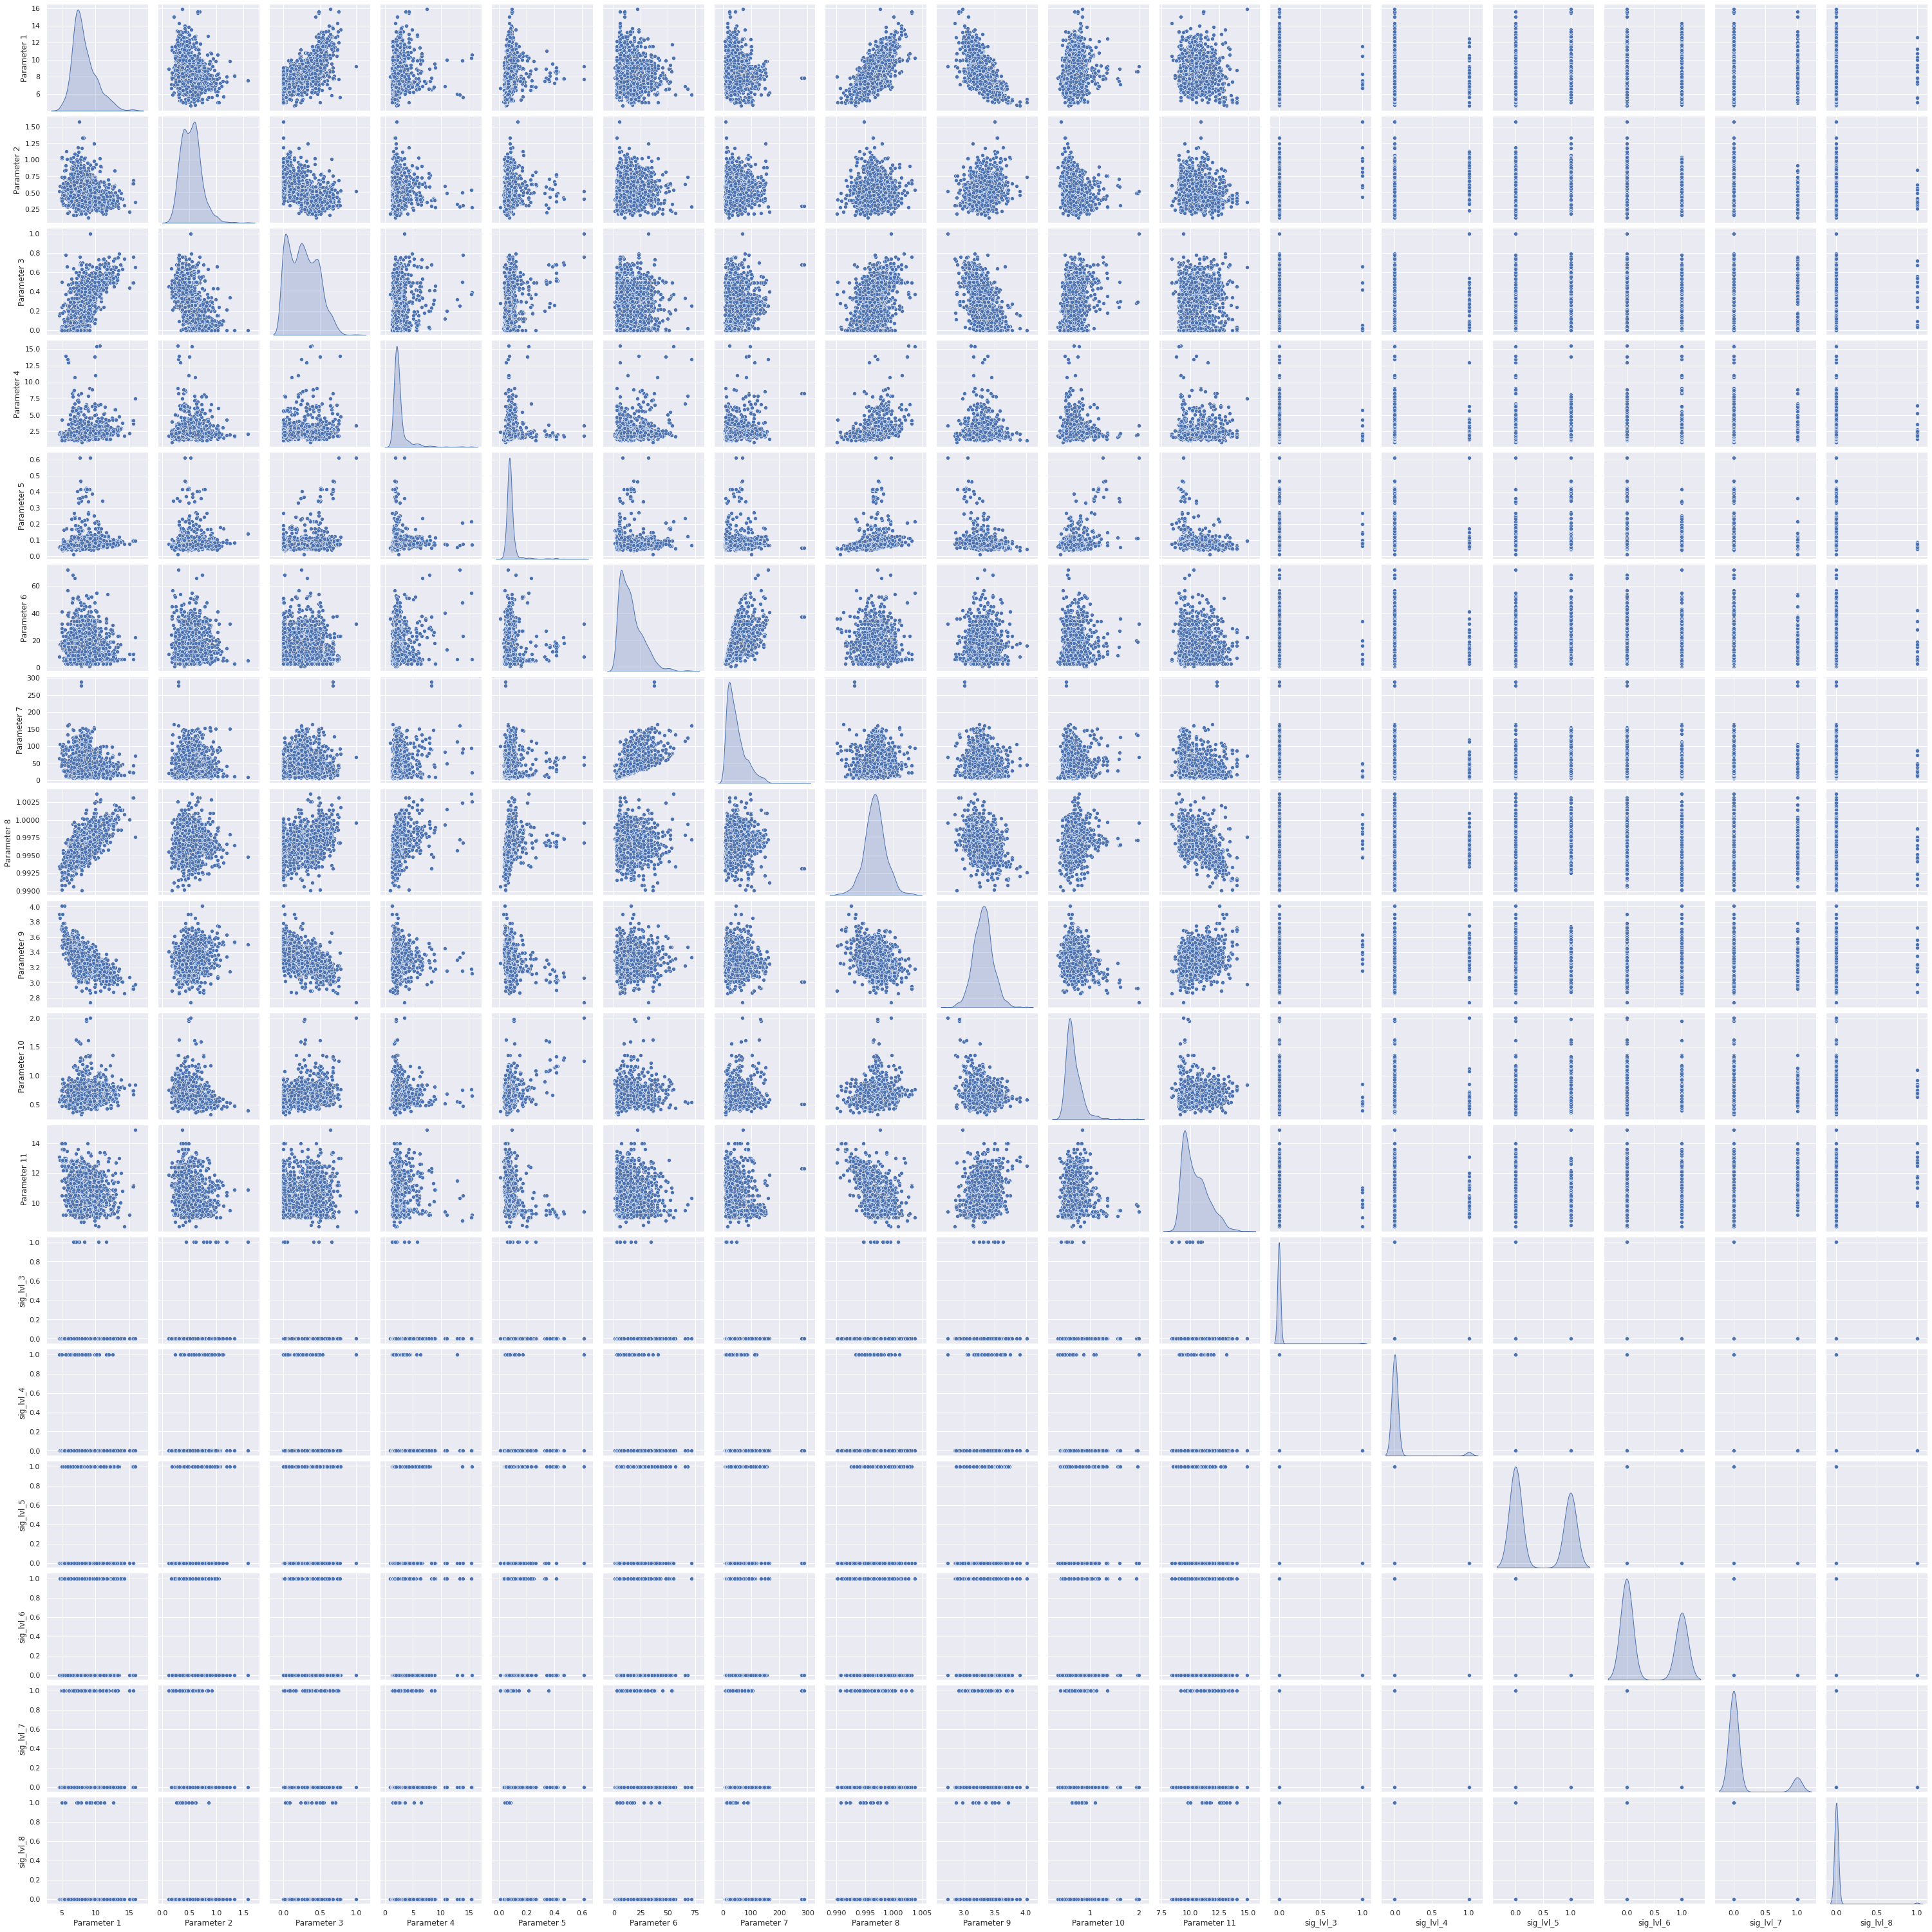

In [14]:
plt.figure(figsize = (5,5) )
sns.pairplot(df_1, diag_kind = 'kde', )

From the pairplot, it can observed that a quite a few collinearities and inclined skews can be observed from the histograms and plots. 

Signal level 3 and 8 seem to be a lot more distiguished across the feature inputs than other signal levels. 

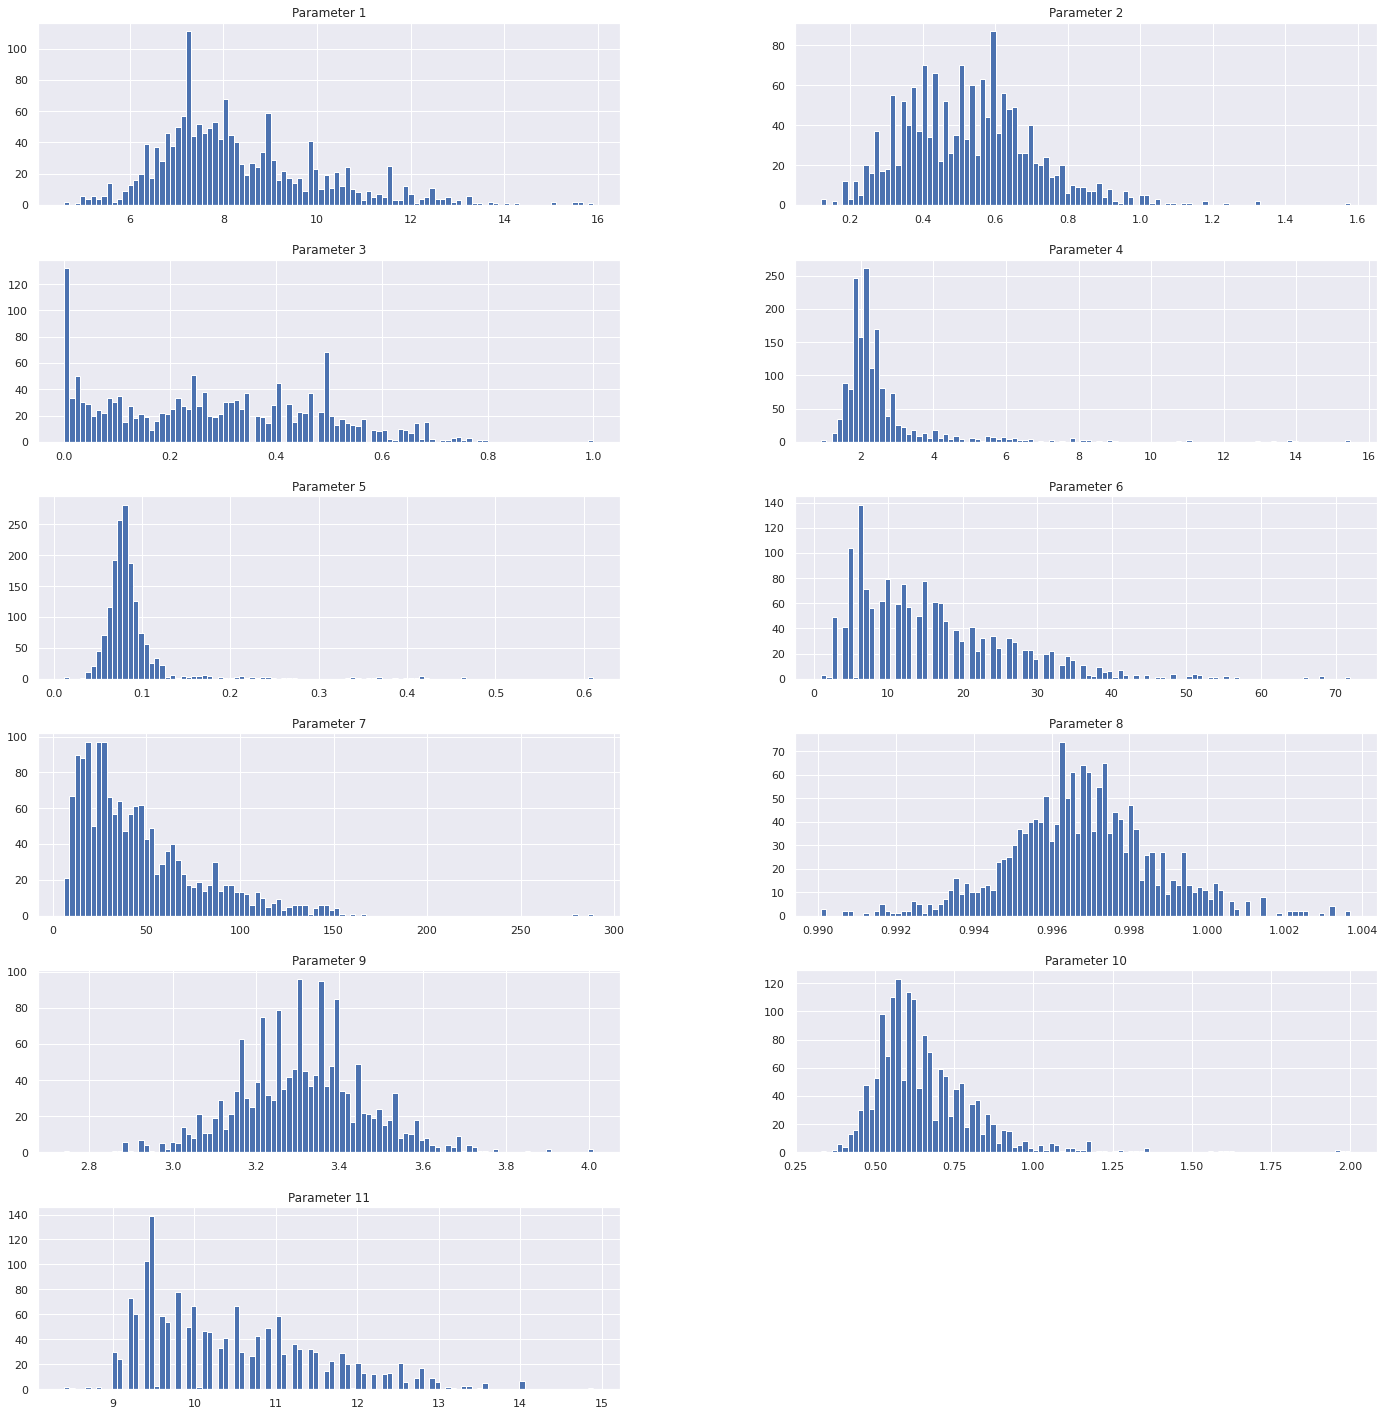

In [15]:
feat = list(df)[0:-1]
df[feat].hist(stacked = False,bins=100,figsize=(24,60),layout = (14,2));


Many parameters seem skewed on varying severities and some have close to normal distributions. 

In [16]:
df.skew()

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64

leadings skewnesses in some parameters could be indicators of possible outliers.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

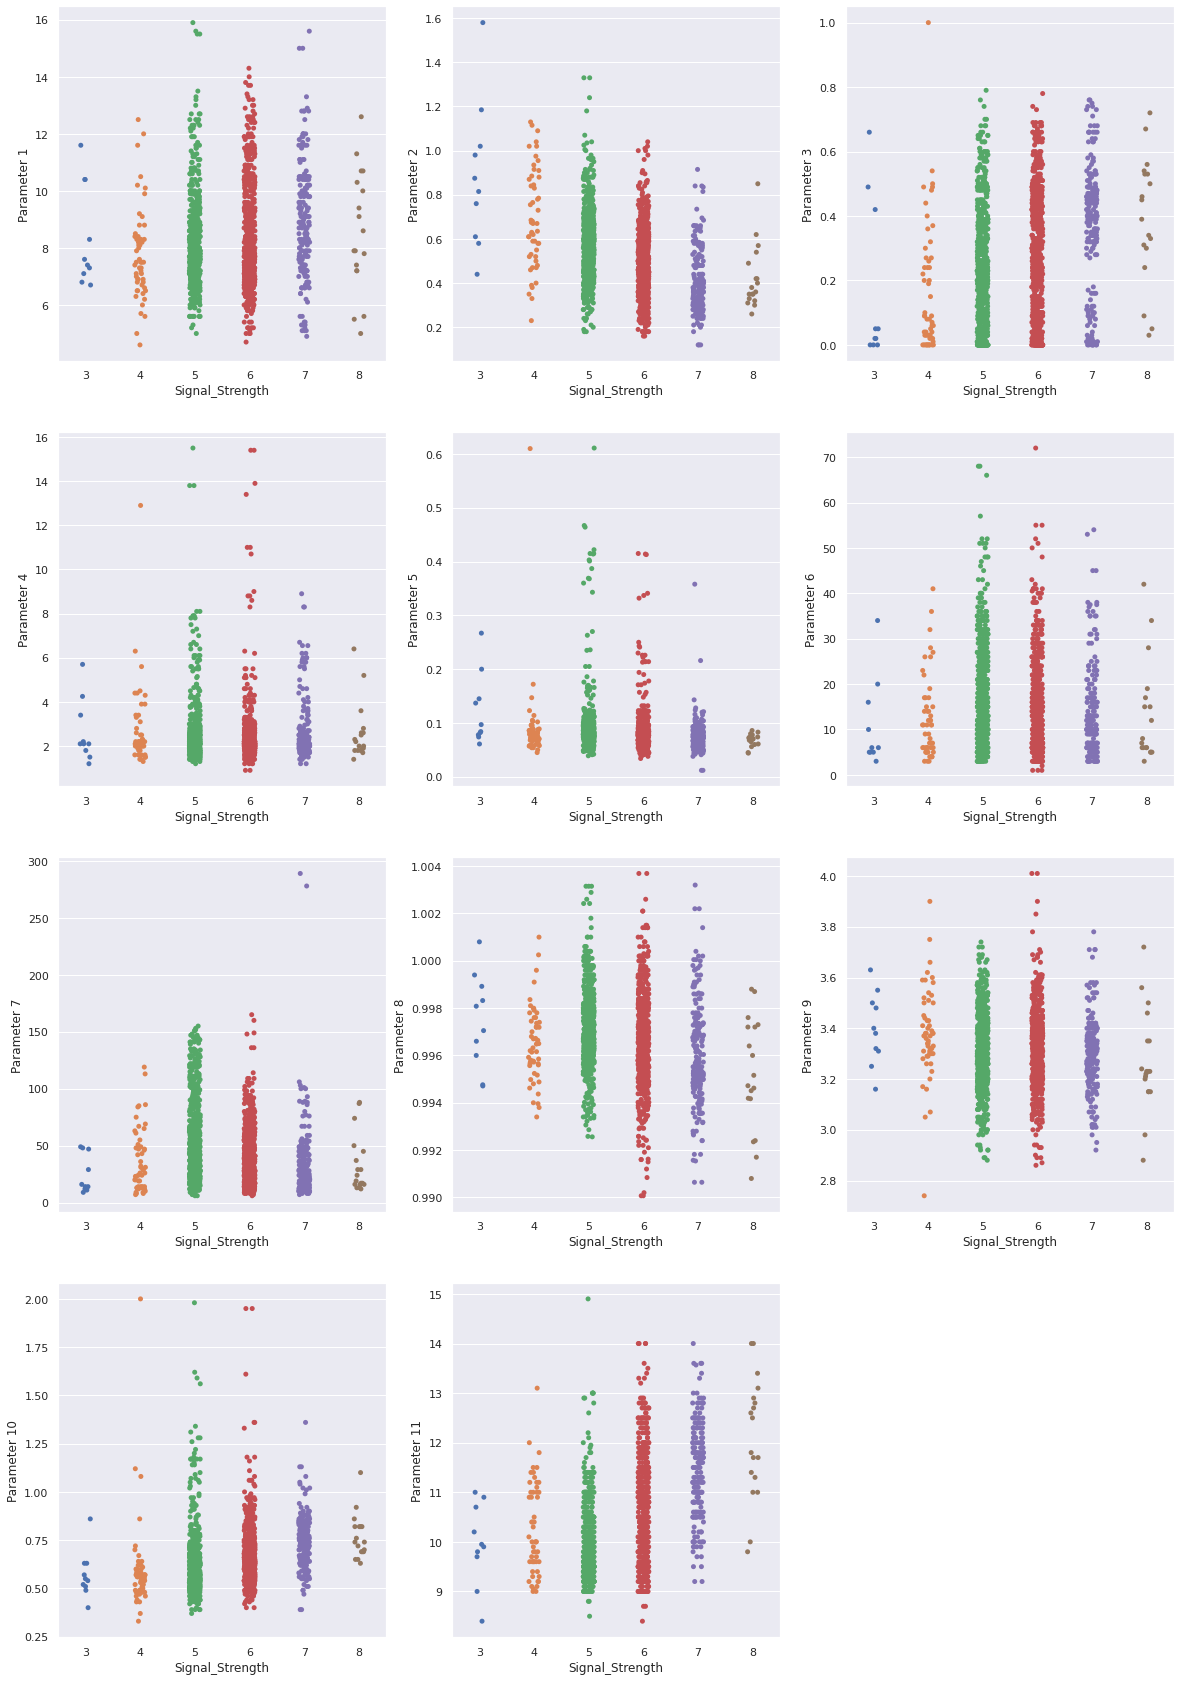

In [17]:
plt.figure(figsize=(20,30))
j=1
for i in feat: 
    plt.subplot(4,3,j)
    sns.stripplot(df['Signal_Strength'],df[i])
    j+=1

No parameter can be virtually observed to have distinguishing effects on the different Signal Strengths except by a few qualities like the density of the strength levels and the range. 

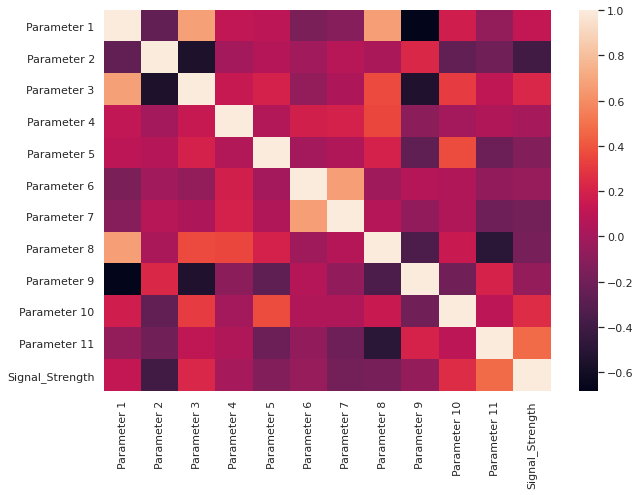

In [18]:
plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr)

A few parameters seem to be well correllated with the signal_strength parameter. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


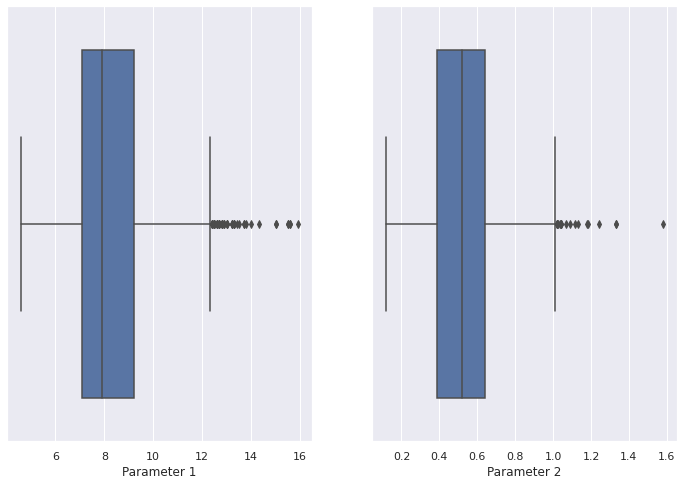

In [19]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 1'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


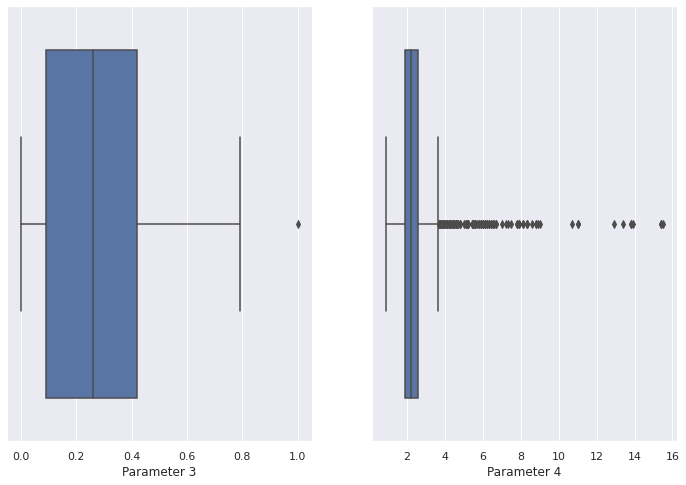

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 3'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 4'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


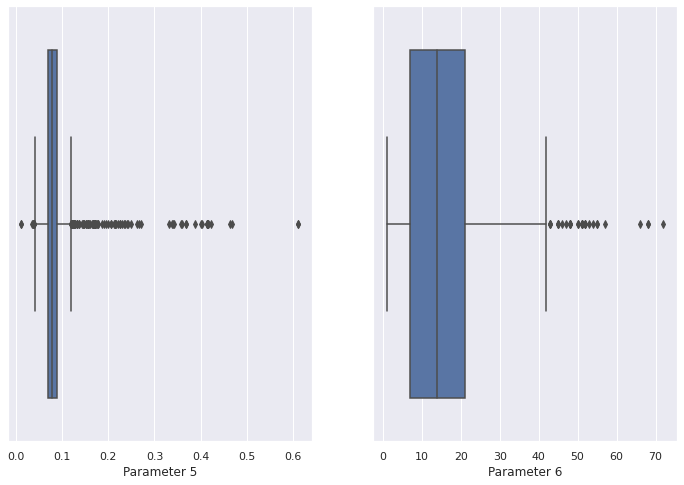

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 5'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 6'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


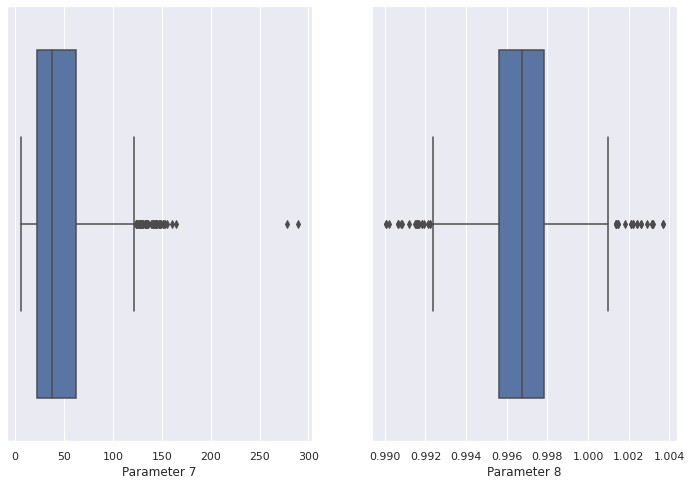

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 7'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 8'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


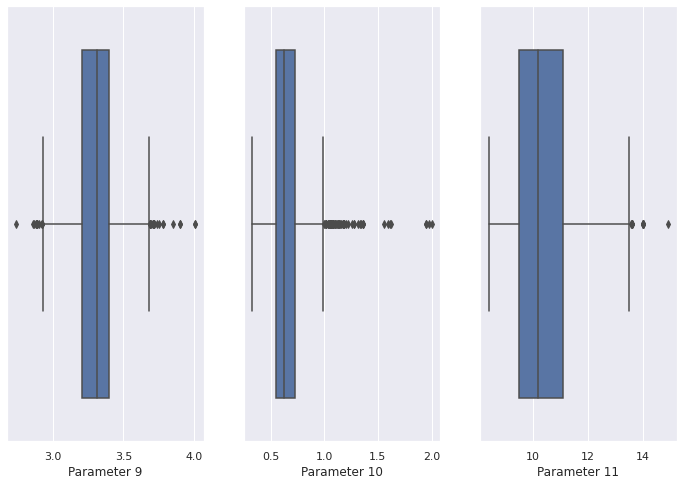

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.boxplot(df['Parameter 9'])

plt.subplot(1,3,2)
sns.boxplot(df['Parameter 10'])


plt.subplot(1,3,3)
sns.boxplot(df['Parameter 11'])

Almost all column data have outliers in them. 

In [24]:
feat_desc = df.describe()

In [25]:
outlier_list = []
j=1
for i in list(feat_desc):
    print(j)
    j+=1
    q1 = feat_desc[i]['25%']
    q3 = feat_desc[i]['75%']
    iqr = np.abs(q1 - q3)
    up_lim = q3 + 1.5*iqr
    dwn_lim = q1 - 1.5*iqr
    mx = feat_desc[i]['max']
    mn = feat_desc[i]['min']
    if ((mn<=dwn_lim)|(mx>=up_lim)):
        print('OUTLIER PRESENCE CONFIRMED')
        outlier_list.append(i)
    else: 
        print('NO OUTLIERS')



1
OUTLIER PRESENCE CONFIRMED
2
OUTLIER PRESENCE CONFIRMED
3
OUTLIER PRESENCE CONFIRMED
4
OUTLIER PRESENCE CONFIRMED
5
OUTLIER PRESENCE CONFIRMED
6
OUTLIER PRESENCE CONFIRMED
7
OUTLIER PRESENCE CONFIRMED
8
OUTLIER PRESENCE CONFIRMED
9
OUTLIER PRESENCE CONFIRMED
10
OUTLIER PRESENCE CONFIRMED
11
OUTLIER PRESENCE CONFIRMED
12
OUTLIER PRESENCE CONFIRMED


So as observed outliers do exist in each collumn data.

In [26]:
outlier_list.remove('Signal_Strength')

In [27]:
outlier_list

['Parameter 1',
 'Parameter 2',
 'Parameter 3',
 'Parameter 4',
 'Parameter 5',
 'Parameter 6',
 'Parameter 7',
 'Parameter 8',
 'Parameter 9',
 'Parameter 10',
 'Parameter 11']

In [28]:
def remove_outliers():
    for i in list(outlier_list):
            q1 = feat_desc[i]['25%']
            q3 = feat_desc[i]['75%']
            iqr = np.abs(q1 - q3)
            up_lim = q3 + 1.5*iqr
            dwn_lim = q1 - 1.5*iqr
            mx = feat_desc[i]['max']
            mn = feat_desc[i]['min']
            df[i] = df[i][~((df[i]<dwn_lim)|(df[i]>up_lim))]
            print(f'removed outliers for {i}!')
            print('')
            print('')
     

In [29]:
remove_outliers()

removed outliers for Parameter 1!


removed outliers for Parameter 2!


removed outliers for Parameter 3!


removed outliers for Parameter 4!


removed outliers for Parameter 5!


removed outliers for Parameter 6!


removed outliers for Parameter 7!


removed outliers for Parameter 8!


removed outliers for Parameter 9!


removed outliers for Parameter 10!


removed outliers for Parameter 11!




Therefore, one cycle of outlier removal is completed herewith. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


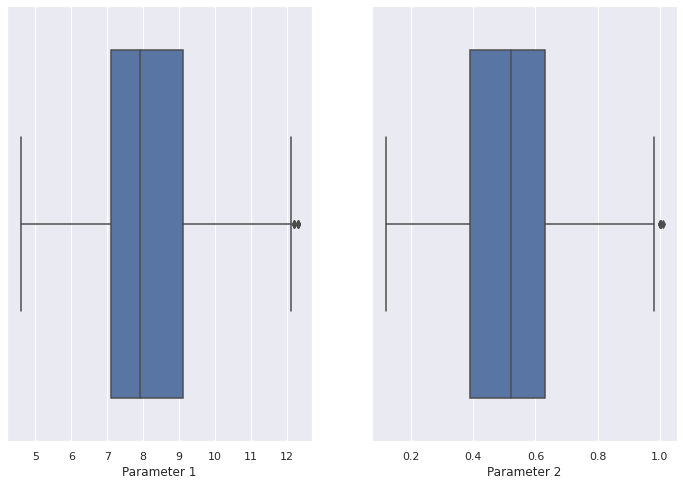

In [30]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 1'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


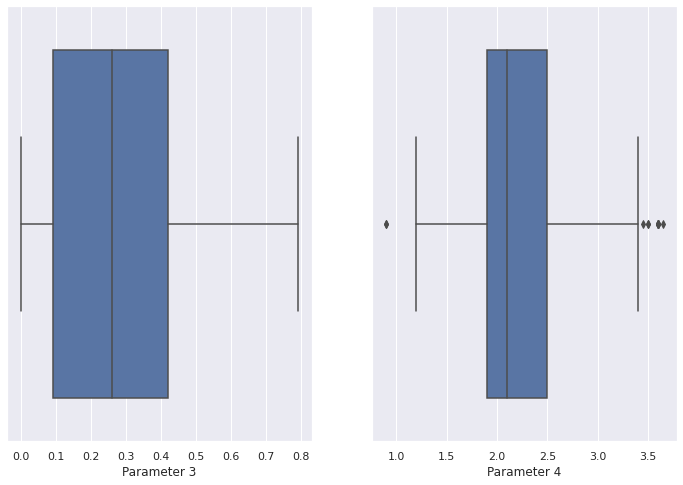

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 3'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 4'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


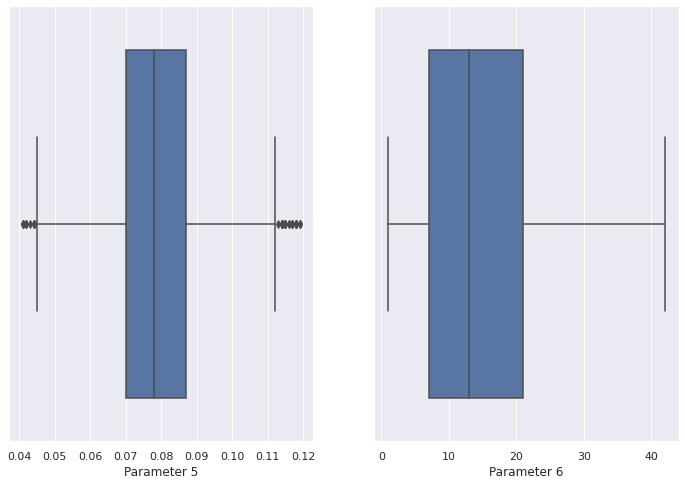

In [32]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 5'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 6'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


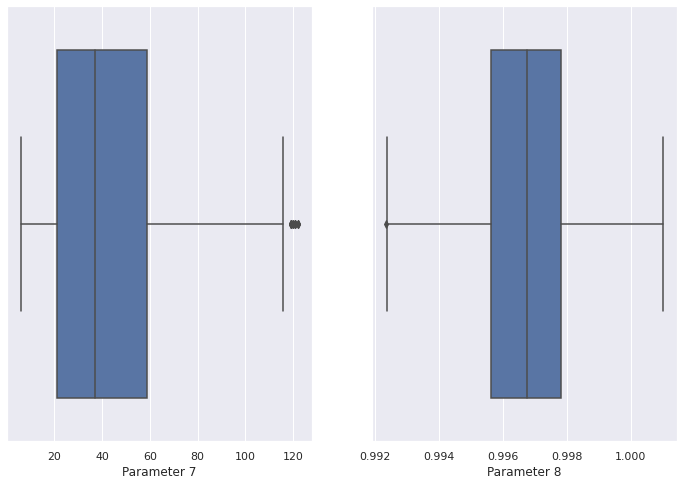

In [33]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.boxplot(df['Parameter 7'])

plt.subplot(1,2,2)
sns.boxplot(df['Parameter 8'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


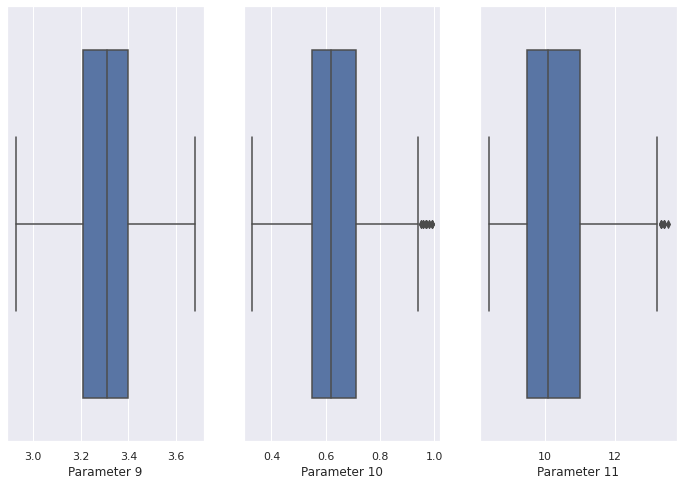

In [34]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.boxplot(df['Parameter 9'])

plt.subplot(1,3,2)
sns.boxplot(df['Parameter 10'])


plt.subplot(1,3,3)
sns.boxplot(df['Parameter 11'])

Observing from the above bar charts it is clear most of the extreme outliers have been eliminated. 

Therefore all validity checks have been performed for the dataset for training models on and the dataset seems perfect 0 missing values, ambiguous values and lesser outliers. 

###### Going further which features need to be retained and which need not shall be decided based on the test or validation scores and going further the effect of pca shall be observed. 

lets's scale the dataset once before proceeding to the model build

In [35]:
df.isna().any().any()

True

In [36]:
median_filler = lambda x:x.fillna(x.median())
df_fill = df.apply(median_filler,axis=0)

In [37]:
dfs_info['df_fill'] = ['df nan median filled']
dfs_info

{'df_1': 'target_var -> dummy_var', 'df_fill': ['df nan median filled']}

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df_fill

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0             7.4        0.700  ...           9.4                5
1             7.8        0.880  ...           9.8                5
2             7.8        0.760  ...           9.8                5
3            11.2        0.280  ...           9.8                6
4             7.4        0.700  ...           9.4                5
...           ...          ...  ...           ...              ...
1594          6.2        0.600  ...          10.5                5
1595          5.9        0.550  ...          11.2                6
1596          6.3        0.510  ...          11.0                6
1597          5.9        0.645  ...          10.2                5
1598          6.0        0.310  ...          11.0                6

[1599 rows x 12 columns]

In [40]:
x,y = df_fill.iloc[:,0:-1], df_fill.iloc[:,-1]

In [41]:
print(x)
print(y)

      Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
0             7.4        0.700  ...          0.56           9.4
1             7.8        0.880  ...          0.68           9.8
2             7.8        0.760  ...          0.65           9.8
3            11.2        0.280  ...          0.58           9.8
4             7.4        0.700  ...          0.56           9.4
...           ...          ...  ...           ...           ...
1594          6.2        0.600  ...          0.58          10.5
1595          5.9        0.550  ...          0.76          11.2
1596          6.3        0.510  ...          0.75          11.0
1597          5.9        0.645  ...          0.71          10.2
1598          6.0        0.310  ...          0.66          11.0

[1599 rows x 11 columns]
0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: Signal_Strength, Length: 1599, dtype: int64


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[0.54545455, 0.35294118, 0.56962025, ..., 0.52      , 0.67741935,
        0.33333333],
       [0.28571429, 0.29411765, 0.39240506, ..., 0.6       , 0.43548387,
        0.33333333],
       [0.58441558, 0.23529412, 0.49367089, ..., 0.33333333, 0.72580645,
        0.50980392],
       ...,
       [0.4025974 , 0.38823529, 0.32911392, ..., 0.61333333, 0.43548387,
        0.23529412],
       [0.81818182, 0.24705882, 0.73417722, ..., 0.38666667, 0.66129032,
        0.33333333],
       [0.45454545, 0.67058824, 0.        , ..., 0.6       , 0.14516129,
        0.23529412]])

In [45]:
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_test

array([[0.42105263, 0.20930233, 0.97368421, ..., 0.34246575, 0.66666667,
        0.44680851],
       [0.80263158, 0.3255814 , 0.53947368, ..., 0.17808219, 0.51515152,
        0.12765957],
       [0.34210526, 0.63953488, 0.34210526, ..., 0.28767123, 0.43939394,
        0.14893617],
       ...,
       [0.38157895, 0.61046512, 0.03947368, ..., 0.57534247, 0.1969697 ,
        0.34042553],
       [0.52631579, 0.64534884, 0.13157895, ..., 0.49315068, 0.48484848,
        0.18085106],
       [0.60526316, 0.41860465, 0.38157895, ..., 0.36986301, 0.59090909,
        0.53191489]])

### STEP 3: MODEL DESIGNING, TRAINING AND TUNING

In [46]:
import tensorflow as tf

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [48]:
x_train.shape

(1119, 11)

In [49]:
model = Sequential()
model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(94,activation='relu'))
model.add(Dense(1,activation='linear'))

In [50]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [51]:
model.fit(x_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
6/6 [==============================] - 1s 97ms/step - loss: 36.1652 - mse: 36.1652 - mae: 5.9682 - val_loss: 30.9445 - val_mse: 30.9445 - val_mae: 5.5026
Epoch 2/30
6/6 [==============================] - 0s 11ms/step - loss: 33.1314 - mse: 33.1314 - mae: 5.7103 - val_loss: 30.1201 - val_mse: 30.1201 - val_mae: 5.4276
Epoch 3/30
6/6 [==============================] - 0s 11ms/step - loss: 30.6384 - mse: 30.6384 - mae: 5.4841 - val_loss: 29.2444 - val_mse: 29.2444 - val_mae: 5.3468
Epoch 4/30
6/6 [==============================] - 0s 10ms/step - loss: 28.0031 - mse: 28.0031 - mae: 5.2323 - val_loss: 28.2900 - val_mse: 28.2900 - val_mae: 5.2573
Epoch 5/30
6/6 [==============================] - 0s 10ms/step - loss: 26.0127 - mse: 26.0127 - mae: 5.0319 - val_loss: 27.2388 - val_mse: 27.2388 - val_mae: 5.1567
Epoch 6/30
6/6 [==============================] - 0s 11ms/step - loss: 23.5448 - mse: 23.5448 - mae: 4.7770 - val_loss: 26.0697 - val_mse: 26.0697 - val_mae: 5.0423
Epoch 7/30

In [52]:
model.compile(loss='mse', optimizer='adam', metrics='mse')

In [53]:
model.fit(x_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
6/6 [==============================] - 1s 38ms/step - loss: 1.8413 - mse: 1.8413 - val_loss: 3.1223 - val_mse: 3.1223
Epoch 2/30
6/6 [==============================] - 0s 9ms/step - loss: 1.7913 - mse: 1.7913 - val_loss: 2.6906 - val_mse: 2.6906
Epoch 3/30
6/6 [==============================] - 0s 10ms/step - loss: 1.6128 - mse: 1.6128 - val_loss: 2.2278 - val_mse: 2.2278
Epoch 4/30
6/6 [==============================] - 0s 10ms/step - loss: 1.5881 - mse: 1.5881 - val_loss: 1.8531 - val_mse: 1.8531
Epoch 5/30
6/6 [==============================] - 0s 9ms/step - loss: 1.3967 - mse: 1.3967 - val_loss: 1.6071 - val_mse: 1.6071
Epoch 6/30
6/6 [==============================] - 0s 10ms/step - loss: 1.3142 - mse: 1.3142 - val_loss: 1.3852 - val_mse: 1.3852
Epoch 7/30
6/6 [==============================] - 0s 10ms/step - loss: 1.2503 - mse: 1.2503 - val_loss: 1.1416 - val_mse: 1.1416
Epoch 8/30
6/6 [==============================] - 0s 10ms/step - loss: 1.1058 - mse: 1.1058 - val_l

In [54]:
model.compile(loss='mse', optimizer='sgd', metrics='mse')

In [55]:
model.fit(x_train, y_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
6/6 [==============================] - 1s 40ms/step - loss: 0.4445 - mse: 0.4445 - val_loss: 0.8594 - val_mse: 0.8594
Epoch 2/30
6/6 [==============================] - 0s 10ms/step - loss: 0.4658 - mse: 0.4658 - val_loss: 0.8180 - val_mse: 0.8180
Epoch 3/30
6/6 [==============================] - 0s 10ms/step - loss: 0.4432 - mse: 0.4432 - val_loss: 0.8403 - val_mse: 0.8403
Epoch 4/30
6/6 [==============================] - 0s 9ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.7958 - val_mse: 0.7958
Epoch 5/30
6/6 [==============================] - 0s 10ms/step - loss: 0.4493 - mse: 0.4493 - val_loss: 0.8133 - val_mse: 0.8133
Epoch 6/30
6/6 [==============================] - 0s 11ms/step - loss: 0.4304 - mse: 0.4304 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 7/30
6/6 [==============================] - 0s 9ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.8094 - val_mse: 0.8094
Epoch 8/30
6/6 [==============================] - 0s 10ms/step - loss: 0.4278 - mse: 0.4278 - val_l

In [56]:
from tensorflow.keras import optimizers, regularizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(94,activation='relu'))
    model.add(Dense(1,activation='linear', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='mse', optimizer=sgd, metrics=['mse'])
    
    # Fit the model
    model.fit(x_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    




In [57]:
lr = 1e4
Lambda = 0

train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 5ms/step - loss: 66829542689653946479534128607789056.0000 - mse: 66829542689653946479534128607789056.0000


In [58]:
lr = 1e2
Lambda = 0
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 8ms/step - loss: 1649948955621283072.0000 - mse: 1649948955621283072.0000


In [59]:
lr = 1e2
Lambda = 100
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 6ms/step - loss: 1039656818403409133568.0000 - mse: 1039656818403409133568.0000


In [60]:
lr = 1
Lambda = 100
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 9ms/step - loss: 1898382.7909 - mse: 1318810.0130


In [61]:
lr = 1e-2
Lambda = 100
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 8ms/step - loss: 243.8324 - mse: 33.4878


In [62]:
lr = 1e-2
Lambda = 1e3
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 6ms/step - loss: 53591.5732 - mse: 40.9392


In [63]:
lr = 1e-2
Lambda = 1
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 8ms/step - loss: 34.4007 - mse: 32.5578


In [64]:
lr = 1e-2
Lambda = 1e-1
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 5ms/step - loss: 29.3067 - mse: 29.0768


In [65]:
lr = 1e-2
Lambda = 1e-2
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 7ms/step - loss: 32.8101 - mse: 32.7879


In [66]:
lr = 1e-1
Lambda = 1e-2
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 6ms/step - loss: 31.0935 - mse: 31.0727


In [67]:
lr = 1
Lambda = 1e-2
train_and_test_loop(1,lr,Lambda)

2/2 [==============================] - 1s 5ms/step - loss: 381.4833 - mse: 381.3840


So it's clear that over regularization and learning rates breaching 1 can lead to exploding costs. 

In [68]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(94,activation='relu'))
    model.add(Dense(1,activation='linear', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='mse', optimizer=sgd, metrics=['mse'])
    
    # Fit the model
    model.fit(x_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_train, y_train, verbose=0)

In [69]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = math.pow(10, np.random.uniform(-5,0))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 32.3654 - mse: 32.3652
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 32.1027 - mse: 32.1025
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 31.4579 - mse: 31.4577
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 30.6621 - mse: 30.6619
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 29.7112 - mse: 29.7110
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 28.6701 - mse: 28.6700
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4579 - mse: 27.4577
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 26.2445 - mse: 26.2443
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 24.9614 - mse: 24.9613
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 23.6556 - mse: 23.6554
Epoch 11/100
2/2 [==============================] - 0s 4ms/

The above ranges of learning rates and lambda were just to observe the worst boundaries of the hyperparameters values. 

It could be observed that loss was the least at a learning rate of e-2 and 

### NARROWING DOWN. 

In [70]:
import math
for k in range(1,11):
    lr = np.random.uniform(0.01, 0.03) #math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = np.random.uniform(0.001,3.0) #math.pow(10, np.random.uniform(-5.0, 0))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 36.7975 - mse: 31.2594
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7053 - mse: 7.6736
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 6.5637 - mse: 2.0701
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 7.9850 - mse: 4.3826
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 6.4544 - mse: 3.6168
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 2.3640 - mse: 1.6869
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 1.8306 - mse: 0.7606
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 2.2301 - mse: 0.6767
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 2.0520 - mse: 1.0573
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 1.7969 - mse: 1.0824
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 1.54

Nothing yet has beaten the lowest loss of 0.3968. 

In [71]:
import math
for k in range(1,11):
    lr = np.random.uniform(0.012, 0.017) #math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = np.random.uniform(2.5,3.0) #math.pow(10, np.random.uniform(-5.0, 0))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 34.3143 - mse: 29.1123
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 15.5655 - mse: 10.8367
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 14.3366 - mse: 8.0240
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.3791 - mse: 4.8935
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 6.6398 - mse: 4.1679
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 6.7934 - mse: 4.0319
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 4.3466 - mse: 3.6370
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 1.7373 - mse: 0.7391
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 2.8157 - mse: 1.4442
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 2.5442 - mse: 1.7424
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 1.

Since, no amount of narrowing seems to reach a lower point of loss than 0.3968, the model shall be finalised with the parameters for the same. 

In [72]:
import math
for k in range(1,6):
    lr = np.random.uniform(0.013, 0.015) #math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = np.random.uniform(2.5,2.98) #math.pow(10, np.random.uniform(-5.0, 0))
    best_acc = train_and_test_loop1(1000, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 10, best_acc, lr, Lambda))

Streaming output truncated to the last 5000 lines.
Epoch 504/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.4449 - mse: 0.4322
Epoch 505/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.4598 - mse: 0.4394
Epoch 506/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.4351 - mse: 0.4219
Epoch 507/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.4426 - mse: 0.4329
Epoch 508/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.4448 - mse: 0.4175
Epoch 509/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.4339 - mse: 0.4136
Epoch 510/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.4610 - mse: 0.4521
Epoch 511/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.4549 - mse: 0.4258
Epoch 512/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.4354 - mse: 0.4122
Epoch 513/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.4526 - mse: 0.444

In [73]:
train_and_test_loop(2000, 0.014, 2.9, verb=True)

Epoch 1/2000
2/2 [==============================] - 1s 9ms/step - loss: 35.9660 - mse: 30.7514
Epoch 2/2000
2/2 [==============================] - 0s 9ms/step - loss: 18.3166 - mse: 13.7997
Epoch 3/2000
2/2 [==============================] - 0s 5ms/step - loss: 13.0476 - mse: 6.1351
Epoch 4/2000
2/2 [==============================] - 0s 5ms/step - loss: 6.7554 - mse: 2.4408
Epoch 5/2000
2/2 [==============================] - 0s 5ms/step - loss: 10.2079 - mse: 7.6025
Epoch 6/2000
2/2 [==============================] - 0s 6ms/step - loss: 3.6542 - mse: 1.1413
Epoch 7/2000
2/2 [==============================] - 0s 4ms/step - loss: 3.9432 - mse: 2.0455
Epoch 8/2000
2/2 [==============================] - 0s 9ms/step - loss: 3.7100 - mse: 3.1134
Epoch 9/2000
2/2 [==============================] - 0s 5ms/step - loss: 1.8062 - mse: 0.8845
Epoch 10/2000
2/2 [==============================] - 0s 8ms/step - loss: 3.0753 - mse: 1.6806
Epoch 11/2000
2/2 [==============================] - 0s 8ms/ste

It appears as though the loss staganates at a point and oscillates around it. Therefore, it should be time the model got pickled it for future deployment. 


### STEP 4: PICKLING THE MODEL

In [74]:

from keras.models import load_model
model.save("NN_reg.h5")
loaded_model = load_model("NN_reg.h5")


In [75]:
loaded_model

In [76]:
loaded_model.evaluate(x_test, y_test, verbose=0)

[0.500783383846283, 0.500783383846283]

That appears to be a not too bad score with mse value of 0.53 around. 

# PART 2: BUILDING A NEURAL NETWORK CLASSIFIER

In [77]:
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

### STEP 2: CONVERTING THE OUTPUT VARIABLES TO CATEGORICAL VARIABLES 

In [78]:
y_train.head()

467     6
917     6
1323    7
132     5
256     5
Name: Signal_Strength, dtype: int64

In [79]:
encoder = LabelEncoder()
encoder.fit(y_train)

LabelEncoder()

In [80]:
y_train_le = encoder.transform(y_train)

In [81]:
y_train_cat = np_utils.to_categorical(y_train_le)

In [82]:
print(y_train_le)

[3 3 4 ... 2 2 1]


In [83]:
print(y_train_cat)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [84]:
y_train_cat.shape

(1119, 6)

In [85]:
x_train.shape

(1119, 11)

### STEP 3: DESIGNING, TRAINING AND TUNING THE MODEL

In [86]:
 from tensorflow.keras import optimizers, regularizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(94,activation='relu'))
    model.add(Dense(6,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train_cat, epochs=iterations, batch_size=1000, verbose= 1)

In [87]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

2/2 [==============================] - 1s 9ms/step - loss: 1.8863 - accuracy: 0.0790


In [88]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

2/2 [==============================] - 1s 8ms/step - loss: 11549.8109 - accuracy: 0.0330


In [89]:
lr = 0.00001
Lambda = 1
train_and_test_loop(1, lr, Lambda)

2/2 [==============================] - 1s 10ms/step - loss: 13.1528 - accuracy: 0.2502


lr = 0.00001
Lambda = 1e-1
train_and_test_loop(1, lr, Lambda)

In [90]:
x_train_subset = x_train[0:20]
y_train_subset = y_train_cat[0:20]

In [91]:
from tensorflow.keras import optimizers, regularizers

def train_and_test_loop_subset(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(94,activation='relu'))
    model.add(Dense(6,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train_subset, y_train_subset, epochs=iterations, batch_size=1000, verbose= 1)

In [92]:
lr = 0.001
Lambda = 0
train_and_test_loop_subset(1000, lr, Lambda)

Epoch 1/1000
1/1 [==============================] - 1s 797ms/step - loss: 1.7055 - accuracy: 0.3500
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.7044 - accuracy: 0.3500
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.7023 - accuracy: 0.3500
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.6993 - accuracy: 0.3500
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.6955 - accuracy: 0.3500
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.6911 - accuracy: 0.3500
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.6860 - accuracy: 0.3500
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.6804 - accuracy: 0.3500
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.6743 - accuracy: 0.3500
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.6678 - accuracy: 0.3500
Epoch 11/1000


The model does seem to perfectly overfit on a small subset of the training data. 

In [93]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(30, lr, Lambda)

Epoch 1/30
2/2 [==============================] - 1s 7ms/step - loss: 1.8620 - accuracy: 0.0290
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 1.8593 - accuracy: 0.0324
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 1.8611 - accuracy: 0.0290
Epoch 4/30
2/2 [==============================] - 0s 5ms/step - loss: 1.8595 - accuracy: 0.0315
Epoch 5/30
2/2 [==============================] - 0s 7ms/step - loss: 1.8599 - accuracy: 0.0316
Epoch 6/30
2/2 [==============================] - 0s 6ms/step - loss: 1.8598 - accuracy: 0.0309
Epoch 7/30
2/2 [==============================] - 0s 7ms/step - loss: 1.8593 - accuracy: 0.0324
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: 1.8592 - accuracy: 0.0314
Epoch 9/30
2/2 [==============================] - 0s 5ms/step - loss: 1.8606 - accuracy: 0.0309
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 1.8606 - accuracy: 0.0305
Epoch 11/30
2/2 [======================

As expected the model does not perform really well with small learning rate and lambda. 

In [94]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(30, lr, Lambda)

Epoch 1/30
2/2 [==============================] - 1s 9ms/step - loss: 124870917468863561629433856.0000 - accuracy: 0.4106
Epoch 2/30
2/2 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0068
Epoch 3/30
2/2 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0071
Epoch 4/30
2/2 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0074
Epoch 5/30
2/2 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.0064
Epoch 6/30
2/2 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.0071
Epoch 7/30
2/2 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.0074
Epoch 8/30
2/2 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0074
Epoch 9/30
2/2 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.0071
Epoch 10/30
2/2 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0068
Epoch 11/30
2/2 [==================

The gradients have clearly exploded does to the huge learning rate. 

In [95]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(30, lr, Lambda)

Epoch 1/30
2/2 [==============================] - 1s 9ms/step - loss: 49827769003.3246 - accuracy: 0.1670
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0074
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0074
Epoch 4/30
2/2 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0074
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0071
Epoch 6/30
2/2 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0068
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0068
Epoch 8/30
2/2 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0071
Epoch 9/30
2/2 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0074
Epoch 10/30
2/2 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0071
Epoch 11/30
2/2 [==============================] - 0s 8m

The learning rate still seems to be big enough to cause exploding gradients. 

In [96]:
from tensorflow.keras import optimizers, regularizers

def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(94,activation='relu'))
    model.add(Dense(6,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train_cat, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_train, y_train_cat, verbose=0)
    
    return score

Now that the boundaries of model have been fairly traced, it's time the searched narrowed to smaller range of values. 

In [97]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 314.5118 - accuracy: 0.1824
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 142298970853097342236622848.0000 - accuracy: 0.4141
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 2838577107451621203179995136.0000 - accuracy: 0.3992
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 399010932627313001723068416.0000 - accuracy: 0.4185
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 1438210928648716680284864512.0000 - accuracy: 0.4131
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 709003732121689810324684800.0000 - accuracy: 0.4127
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 538998526440553177252102144.0000 - accuracy: 0.4208
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 789631523584481140230062080.0000 - accuracy: 0.3948
Epoch 9/100
2/2 [====================

Epochs 2 and 8 seem to be the best cases for the model. 

In [98]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-3,-1))
    best_acc = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 2.2730 - accuracy: 0.0826
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 2.0333 - accuracy: 0.4016
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 1.7560 - accuracy: 0.4404
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 1.6047 - accuracy: 0.4282
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 1.5378 - accuracy: 0.4611
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 1.4905 - accuracy: 0.5071
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 1.4333 - accuracy: 0.5038
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3605 - accuracy: 0.5075
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 1.2858 - accuracy: 0.5268
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 1.2503 - accuracy: 0.5485
Epoch 11/100
2/2 [==========

The model has reached a highest of 60% at epoch 4. Therefore, a little bit more narrowed search is warranted. 

In [99]:
import math
for k in range(1,10):
    lr = np.random.uniform(0.009, 0.075)  #math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = np.random.uniform(0.005, 0.09) #math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop1(500, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Streaming output truncated to the last 5000 lines.
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 2.2010 - accuracy: 0.4118
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 2.1023 - accuracy: 0.4477
Epoch 8/500
2/2 [==============================] - 0s 18ms/step - loss: 2.0168 - accuracy: 0.4532
Epoch 9/500
2/2 [==============================] - 0s 15ms/step - loss: 1.9402 - accuracy: 0.4773
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 1.8748 - accuracy: 0.5171
Epoch 11/500
2/2 [==============================] - 0s 12ms/step - loss: 1.8164 - accuracy: 0.5233
Epoch 12/500
2/2 [==============================] - 0s 16ms/step - loss: 1.7638 - accuracy: 0.5303
Epoch 13/500
2/2 [==============================] - 0s 6ms/step - loss: 1.7208 - accuracy: 0.5335
Epoch 14/500
2/2 [==============================] - 0s 7ms/step - loss: 1.6749 - accuracy: 0.5341
Epoch 15/500
2/2 [==============================] - 0s 11ms/step - 

In [100]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-3.0, -4.0)) #np.random.uniform(0.009, 0.075)  
    Lambda = math.pow(10, np.random.uniform(-2,-1)) #np.random.uniform(0.005, 0.09) 
    best_acc = train_and_test_loop1(500, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Streaming output truncated to the last 5000 lines.
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 2.7980 - accuracy: 0.3178
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 2.7831 - accuracy: 0.3474
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 2.7670 - accuracy: 0.3805
Epoch 9/500
2/2 [==============================] - 0s 17ms/step - loss: 2.7504 - accuracy: 0.3963
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 2.7340 - accuracy: 0.4014
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 2.7171 - accuracy: 0.4101
Epoch 12/500
2/2 [==============================] - 0s 4ms/step - loss: 2.6996 - accuracy: 0.4189
Epoch 13/500
2/2 [==============================] - 0s 10ms/step - loss: 2.6830 - accuracy: 0.4279
Epoch 14/500
2/2 [==============================] - 0s 8ms/step - loss: 2.6643 - accuracy: 0.4469
Epoch 15/500
2/2 [==============================] - 0s 7ms/step - los

In [101]:
from tensorflow.keras import optimizers, regularizers
from keras.layers import Dropout

def train_and_test_loop_drop(iterations, lr, Lambda ,dp, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(dp))
    model.add(Dense(94,activation='relu'))
    model.add(Dropout(dp))
    model.add(Dense(6,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train_cat, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_train, y_train_cat, verbose=0)
    
    return score
    




In [102]:
lr = 0.07258408335707751

Lambda = 0.017434755363840367

dp = 0.5

train_and_test_loop_drop(100, lr, Lambda ,dp, verb=True)





Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 2.1180 - accuracy: 0.1068
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 1.9055 - accuracy: 0.2990
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 1.6512 - accuracy: 0.4449
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 1.5001 - accuracy: 0.4566
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 1.4269 - accuracy: 0.4755
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 1.3945 - accuracy: 0.5148
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 1.3845 - accuracy: 0.4702
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 1.3345 - accuracy: 0.4995
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 1.2854 - accuracy: 0.5178
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 1.2750 - accuracy: 0.5145
Epoch 11/100
2/2 [=========

[1.0076040029525757, 0.5871313810348511]

In [103]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-3.0, -4.0)) #np.random.uniform(0.009, 0.075)  
    Lambda = math.pow(10, np.random.uniform(-2,-1)) #np.random.uniform(0.005, 0.09) 
    best_acc = train_and_test_loop_drop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

# from tensorflow.keras import optimizers, regularizers
# from keras.layers import Dropout

# def train_and_test_loop_drop(iterations, lr, Lambda ,dp, verb=True):

#     ## hyperparameters
#     iterations = iterations
#     learning_rate = lr
#     hidden_nodes = 256
#     output_nodes = 10

#     model = Sequential()
#     model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
#     model.add(BatchNormalization())
#     model.add(Dense(8, activation='relu'))
#     model.add(Dropout(dp))
#     model.add(Dense(94,activation='relu'))
#     model.add(Dropout(dp))
#     model.add(Dense(10,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

#     sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
#     # Compile model
#     model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
#     # Fit the model
#     model.fit(x_train, y_train_cat, epochs=iterations, batch_size=1000, verbose= 1)
#     score = model.evaluate(x_train, y_train_cat, verbose=0)
    
#     return score
    




Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 2.2405 - accuracy: 0.3864
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 2.2395 - accuracy: 0.3861
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 2.2368 - accuracy: 0.3886
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 2.2356 - accuracy: 0.3854
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 2.2322 - accuracy: 0.3868
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 2.2295 - accuracy: 0.3908
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 2.2273 - accuracy: 0.3943
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 2.2235 - accuracy: 0.3962
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 2.2216 - accuracy: 0.3980
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 2.2162 - accuracy: 0.4024
Epoch 11/100
2/2 [========

In [104]:


from tensorflow.keras import optimizers, regularizers
from keras.layers import Dropout

def train_and_test_loop_drop(iterations, lr, Lambda, dp, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10
   

    model = Sequential()
    model.add(Dense(8, input_shape = (11,),kernel_initializer='he_normal',activation=None))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(dp))
    model.add(Dense(94,activation='relu'))
    model.add(Dropout(dp))
    model.add(Dense(6,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(x_train, y_train_cat, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(x_train, y_train_cat, verbose=0)
    
    return score









From all the experimentation above, it's indicated that the below used lr and lambda values and the skipping dropout will be the best conduition for the model. 

In [115]:
lr = 0.075

Lambda = 0.085

dp = 0.1

train_and_test_loop1(3000, lr, Lambda, verb=True)





Streaming output truncated to the last 5000 lines.
Epoch 501/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.9328 - accuracy: 0.6272
Epoch 502/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.9238 - accuracy: 0.6296
Epoch 503/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.9047 - accuracy: 0.6462
Epoch 504/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.9344 - accuracy: 0.6240
Epoch 505/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.9012 - accuracy: 0.6442
Epoch 506/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.9188 - accuracy: 0.6233
Epoch 507/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.9066 - accuracy: 0.6224
Epoch 508/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.9204 - accuracy: 0.6164
Epoch 509/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.9239 - accuracy: 0.6250
Epoch 510/3000
2/2 [==========================

[0.7599156498908997, 0.737265408039093]

There with lambda: 0.072,
          learning rate: 0.017
          dropout ratio: 0.10
          and he_normal weight iniialization. The best accuracy that could be obtained is more or less close to 74% post 3000 iterations.

In [116]:

from keras.models import load_model
model.save("NN_class.h5")
loaded_model_1 = load_model("NN_class.h5")


In [117]:
loaded_model_1



# PART 4 

In [118]:
import h5py 

In [119]:
from google.colab import files
uploaded = files.upload()

Saving Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5 to Part - 4 - Autonomous_Vehicles_SVHN_single_grey1 (2).h5


In [120]:
hf = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1 (2).h5', 'r')

In [124]:
hf

<HDF5 file "Part - 4 - Autonomous_Vehicles_SVHN_single_grey1 (2).h5" (mode r)>

##### LOADING THE TEST AND VALIDATION SETS

In [126]:
X_train = hf['X_train'][:]
y_train = hf['y_train'][:]
X_test = hf['X_test'][:]
y_test = hf['y_test'][:]
# Close this file
hf.close()

In [127]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


##### VISUALIZING THE DATASET

7 2 9 0 9 1 8 4 4 8 
9 1 4 3 5 8 6 5 5 0 
6 5 8 3 2 0 1 9 5 2 
8 9 1 0 9 5 3 3 7 6 
4 2 4 9 6 7 8 8 3 5 
3 7 1 4 8 1 4 2 9 0 
1 5 9 9 2 2 2 4 8 9 
8 3 8 4 5 2 8 6 4 5 
4 2 8 2 4 0 9 9 6 3 
2 7 5 0 7 6 9 8 7 2 


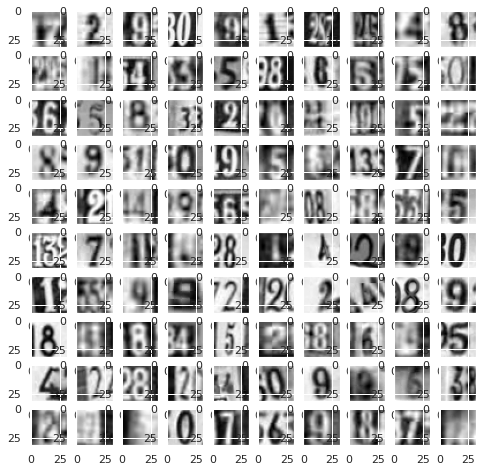

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    print (y_test[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

The training and test data is going to be resized to 28 x 28 to be fit to feed into the neural network with the same input size. 

In [129]:
import cv2
import numpy as np

X_train_resized = np.zeros((X_train.shape[0], 28, 28))
for i in range(X_train.shape[0]):
    X_train_resized[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
 
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  

del(X_train, X_test)

In [130]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 28, 28, 1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 28, 28, 1)

In [131]:
del(X_train_resized, X_test_resized)

Normalization needs to performed. 

In [132]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [133]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (42000, 28, 28, 1)
Images in X_train: 42000
Images in X_test: 18000


In [134]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


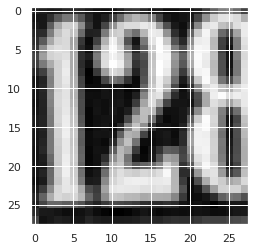

In [135]:
print("Label: ", y_train[0])
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

In [176]:
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable = False
    if('dense' in layers.name):
        print(layers.name + ' is trained')

dense_420 is trained
dense_421 is trained


from google.colab import files
uploaded = files.upload()

In [177]:
# model.load_weights('cnn_mnist_weights.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/cnn_mnist_weights.h5')


In [178]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [179]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 12s 20ms/step - loss: 2.2505 - accuracy: 0.2744


[2.241305112838745, 0.2792222201824188]

In [182]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1313/1313 [==============================] - 57s 43ms/step - loss: 0.9033 - accuracy: 0.7362 - val_loss: 0.6488 - val_accuracy: 0.8259
Epoch 2/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.5449 - accuracy: 0.8469 - val_loss: 0.5523 - val_accuracy: 0.8487
Epoch 3/10
1313/1313 [==============================] - 56s 42ms/step - loss: 0.4236 - accuracy: 0.8786 - val_loss: 0.5214 - val_accuracy: 0.8578
Epoch 4/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.3441 - accuracy: 0.9008 - val_loss: 0.4974 - val_accuracy: 0.8672
Epoch 5/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.2865 - accuracy: 0.9163 - val_loss: 0.4981 - val_accuracy: 0.8676
Epoch 6/10
1313/1313 [==============================] - 56s 43ms/step - loss: 0.2452 - accuracy: 0.9284 - val_loss: 0.5000 - val_accuracy: 0.8667


In [183]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 14s 25ms/step - loss: 0.5000 - accuracy: 0.8667


[0.5000067949295044, 0.8666666746139526]

In [184]:
model.save('cnn_svhn.h5')
model.save_weights('cnn_svhn_weights.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


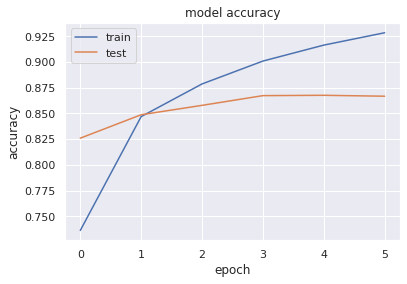

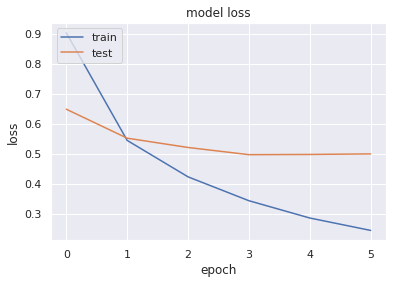

In [185]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Observing the epoch vs loss ploty and epoch vs accuracy plot, that the train and test models perform equally only till the 1st epoch. 

In [46]:

import re
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox  

# from sklearn.externals import joblib 
import skimage
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd
global a


import tensorflow as tf
tf.__version__


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns 
%matplotlib inline 
# sns.set(color_codes = True)


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical

win =  Tk()

win.geometry("420x520")
win.configure(background="cyan")
win.title("The classification Machine")
# win.iconbitmap('icon.ico')

title = Label(win,text="Image Classifier",bg="gray",width="300",height="2",fg="White",font = ("Calibri 20 bold italic underline")).pack()


# submit = Button(win, text="Test", width="12",height="1",activebackground="violet", bg="Pink",command = filedreq,font = ("Calibri 12 ")).place(x=240, y=420)


# reset = Button(win, text="Reset", width="12",height="1",activebackground="red", bg="Pink",font = ("Calibri 12 "),command = reset).place(x=20, y=420)


path = Label(win,bg="cyan",font = ("Verdana 8"))
path.place(x=140,y=380)


def browse():
    filename = filedialog.askopenfilename(filetypes = (("All Files","*.*"),("File","*.jpg")))
    path.config(text = filename) 
    a = filename
    global file 
    file = a
    
def predict_class():
    
    model = tf.keras.models.load_model('xception_model.h5',compile=False) #please place your own model here
    
    pred = model.predict(np.expand_dims(a, axis = 0))[0].astype(int)
    pred = np.array( pred )
    a_file = open("prediction.txt", "w")
    for row in pred:
        np.savetxt(pred, row)
    
    
    
base = Tk()
# Create a canvas
base.geometry('150x150')
    

# load = Button(win, text="load_data", width="12",height="1",activebackground="red", bg="Pink",font = ("Calibri 12 "),command = ).place(x=240, y=100)

    
# targetor = Button(win, text="get_target", width="12",height="1",activebackground="red", bg="Pink",font = ("Calibri 12 "),command = get_target).place(x=20, y=100)    
    

train_reg = Button(win, text="load data", width="12",height="1",activebackground="red", bg="Pink",font = ("Calibri 12 "),command = browse).place(x=20, y=420)
train_class = Button(win, text="predict", width="12",height="1",activebackground="violet", bg="Pink",command = predict_class,font = ("Calibri 12 ")).place(x=240, y=420) 
# x = Button(base, text ='Select a .txt/.csv file', command = lambda:file_opener())
#load your own model in this program. 
    
    
            
            
            
    
            
win.mainloop()
    
            
    
    
    
    


In [35]:
filepath = r"C:\Users\Vishak\Great Learning\Computer Vision\Computer Vision Project\xception_model.h5"

# Load the model
model = tf.keras.models.load_model('xception_model.h5',compile=False)

OSError: SavedModel file does not exist at: xception_model.h5/{saved_model.pbtxt|saved_model.pb}